In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sn
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
from darts.models.forecasting.exponential_smoothing import ExponentialSmoothing
from darts import TimeSeries

In [3]:
df=pd.read_csv(r"C:\Users\Sweta Bisht\OneDrive\Desktop\term2.2_alabs\case_study\3\Electricity Consumption.csv")

In [4]:
df.head(), df.tail()

(       DATE  Electricty_Consumption_in_TW
 0  1/1/1973                       35.9728
 1  2/1/1973                       36.1334
 2  3/1/1973                       35.0625
 3  4/1/1973                       33.8416
 4  5/1/1973                       33.5107,
          DATE  Electricty_Consumption_in_TW
 556  5/1/2019                       97.5860
 557  6/1/2019                      110.8580
 558  7/1/2019                      122.1014
 559  8/1/2019                      121.7765
 560  9/1/2019                      109.7190)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [6]:
df['DATE']=pd.to_datetime(df['DATE'])

In [7]:
df['DATE'].min(),df['DATE'].max()

(Timestamp('1973-01-01 00:00:00'), Timestamp('2019-09-01 00:00:00'))

In [8]:
df['DATE'].dt.year.unique(),df['DATE'].dt.year.nunique()

(array([1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
        1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
        1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
        2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
        2017, 2018, 2019]),
 47)

In [9]:
df.isna().sum()

DATE                            0
Electricty_Consumption_in_TW    0
dtype: int64

In [10]:
df.select_dtypes(include='float').describe()

,Electricty_Consumption_in_TW
count,561.000000
mean,76.681764
std,22.756474
min,33.510700
25%,55.919700
50%,78.417000
75%,93.840600
max,123.216300


In [11]:
df.isna().sum()

DATE                            0
Electricty_Consumption_in_TW    0
dtype: int64

In [12]:
df['DATE'].dt.year.unique()

array([1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019])

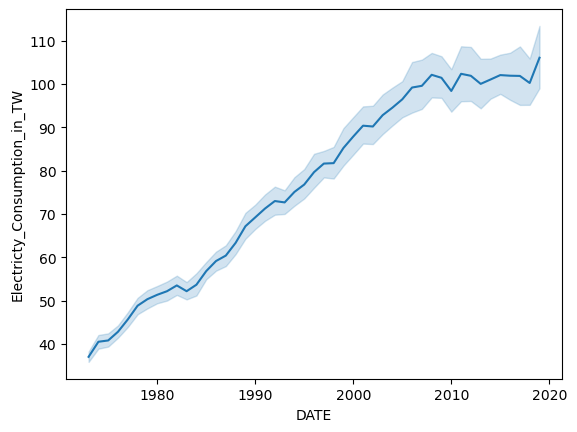

In [13]:
sns.lineplot(df,x=df.DATE.dt.year,y=df.Electricty_Consumption_in_TW)
plt.show()

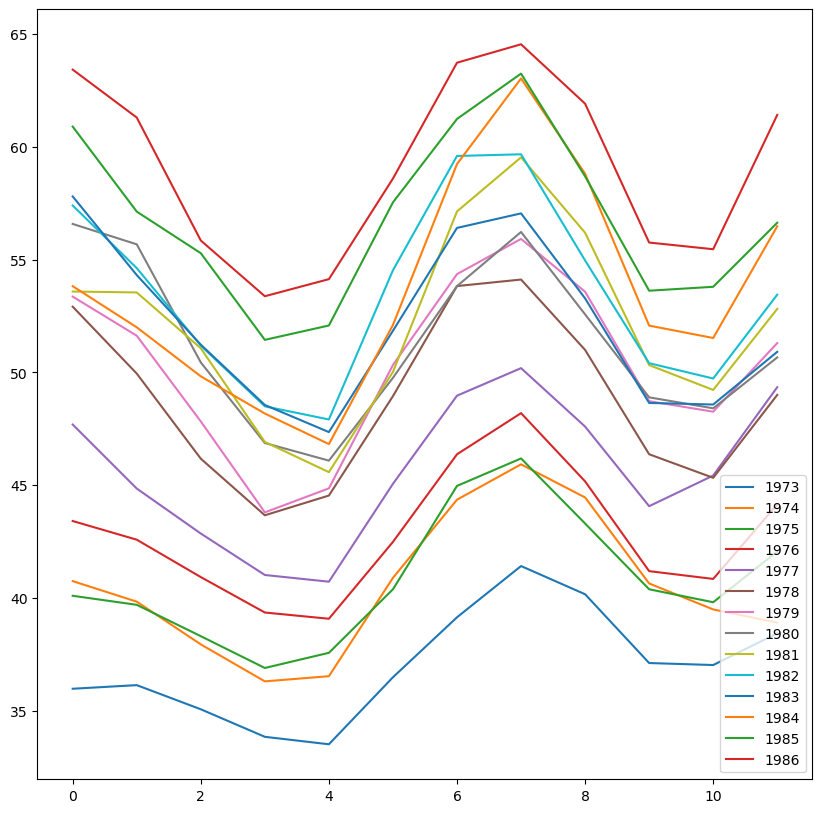

In [14]:
plt.figure(figsize=(10,10))
plt.plot(df[df['DATE'].dt.year==1973]['Electricty_Consumption_in_TW'].values,label='1973')
plt.plot(df[df['DATE'].dt.year==1974]['Electricty_Consumption_in_TW'].values,label='1974')
plt.plot(df[df['DATE'].dt.year==1975]['Electricty_Consumption_in_TW'].values,label='1975')
plt.plot(df[df['DATE'].dt.year==1976]['Electricty_Consumption_in_TW'].values,label='1976')
plt.plot(df[df['DATE'].dt.year==1977]['Electricty_Consumption_in_TW'].values,label='1977')
plt.plot(df[df['DATE'].dt.year==1978]['Electricty_Consumption_in_TW'].values,label='1978')
plt.plot(df[df['DATE'].dt.year==1979]['Electricty_Consumption_in_TW'].values,label='1979')
plt.plot(df[df['DATE'].dt.year==1980]['Electricty_Consumption_in_TW'].values,label='1980')
plt.plot(df[df['DATE'].dt.year==1981]['Electricty_Consumption_in_TW'].values,label='1981')
plt.plot(df[df['DATE'].dt.year==1982]['Electricty_Consumption_in_TW'].values,label='1982')
plt.plot(df[df['DATE'].dt.year==1983]['Electricty_Consumption_in_TW'].values,label='1983')
plt.plot(df[df['DATE'].dt.year==1984]['Electricty_Consumption_in_TW'].values,label='1984')
plt.plot(df[df['DATE'].dt.year==1985]['Electricty_Consumption_in_TW'].values,label='1985')
plt.plot(df[df['DATE'].dt.year==1986]['Electricty_Consumption_in_TW'].values,label='1986')
plt.legend()
plt.show()

In [15]:
df_1=pd.DataFrame({'Date': pd.date_range(start='1973-01-01',end='2019-10-01',freq='M')})

In [16]:
df_1['Date']=df_1['Date'].apply(lambda x:'-'.join(str(x).split('-')[:-1]))

In [17]:
df_1['Date']=pd.to_datetime(df_1['Date'])

In [18]:
df_2=df_1.merge(df,left_on='Date',right_on='DATE')

In [19]:
# checking if all dates are present or not(to ffill or bfill) - all dates are present
df_2.isna().sum()

Date                            0
DATE                            0
Electricty_Consumption_in_TW    0
dtype: int64

In [20]:
df.rename(columns={'DATE':'Date'},inplace=True)

In [21]:
df.head()

,Date,Electricty_Consumption_in_TW
0,1973-01-01,35.9728
1,1973-02-01,36.1334
2,1973-03-01,35.0625
3,1973-04-01,33.8416
4,1973-05-01,33.5107


### agumented dicky fuller test

In [23]:
datapoint=adfuller(df['Electricty_Consumption_in_TW'],maxlag=11)
datapoint

(-2.907485533151477,
 0.04448443064796533,
 11,
 549,
 {'1%': -3.4423174665535385,
  '5%': -2.866818952732754,
  '10%': -2.569581505602171},
 2429.74605420059)

In [24]:
p_value=datapoint[1]
p_value

0.04448443064796533

In [25]:
# H0:time series is non-stationary
# Ha:time series is stationary

if p_value>0.05:
    print('fail to reject null hypothesis')
else:
    print('reject null hypothesis')

reject null hypothesis


In [26]:
# conclusion: Time series is stationary - with lag=11

In [27]:
# spliting the data into train_test
round(0.8*df.shape[0]),df.shape[0]-round(0.8*df.shape[0])

(449, 112)

In [28]:
train=df.iloc[:449,:]
test=df.iloc[449:,:]
train.shape[0],test.shape[0]

(449, 112)

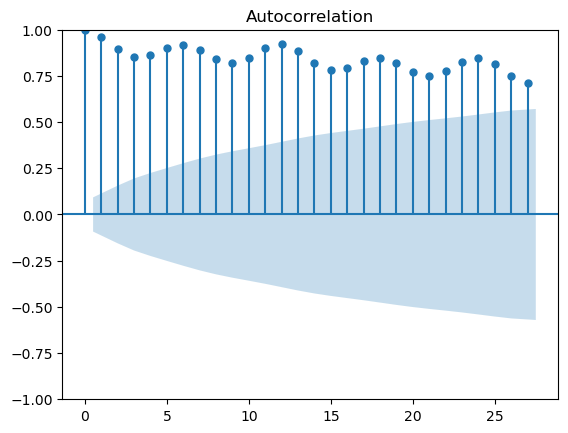

In [29]:
## plotting acf 
fig=sn.graphics.tsa.plot_acf(train['Electricty_Consumption_in_TW'])

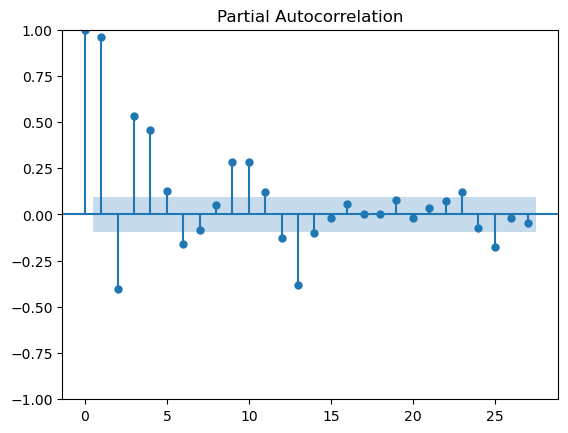

In [30]:
## plotting acf 
fig=sn.graphics.tsa.plot_pacf(train['Electricty_Consumption_in_TW'])

In [31]:
#q=3,p=5
arima=ARIMA(train['Electricty_Consumption_in_TW'],order=(3,0,5))

In [32]:
model=arima.fit()

D:\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [33]:
temp=pd.DataFrame({'forcast':model.predict(start=449,end=560,dynamic=True)})
train_s=pd.concat([df,temp],axis=1)

In [34]:
train_s.tail()

,Date,Electricty_Consumption_in_TW,forcast
556,2019-05-01,97.5860,91.834607
557,2019-06-01,110.8580,101.496531
558,2019-07-01,122.1014,108.021650
559,2019-08-01,121.7765,104.885942
560,2019-09-01,109.7190,95.249642


In [35]:
train_s.isna().sum()

Date                              0
Electricty_Consumption_in_TW      0
forcast                         449
dtype: int64

<Axes: >

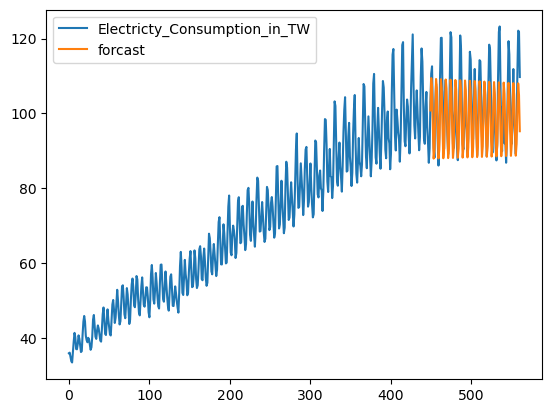

In [36]:
train_s[['Electricty_Consumption_in_TW','forcast']].plot()

In [37]:
test.columns,temp.columns

(Index(['Date', 'Electricty_Consumption_in_TW'], dtype='object'),
 Index(['forcast'], dtype='object'))

In [38]:
# evaluation 
print('MAPE : ',mean_absolute_percentage_error(test['Electricty_Consumption_in_TW'],temp['forcast']))
print('RMSE : ',np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],temp['forcast'])))

MAPE :  0.049974351400070546
RMSE :  6.8327732737473985


In [39]:
## predicting for the next two years
future_df=pd.DataFrame(data=pd.date_range(start='2019-10-01',end='2021-10-01',freq='M'),columns=['Date'])
future_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    24 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 324.0 bytes


In [40]:
future_df['Date']=future_df['Date'].apply(lambda x: '-'.join(str(x).split('-')[:-1]))
future_df['Date']=pd.to_datetime(future_df['Date'])
future_df.head()

,Date
0,2019-10-01
1,2019-11-01
2,2019-12-01
3,2020-01-01
4,2020-02-01


In [217]:
next_2_arima=pd.concat([future_df,pd.DataFrame({'predicted_electricity_demand':model.predict(start=560,end=583,dynamic=True)}).reset_index(drop=True)],axis=1)
next_2_arima.head()

D:\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


,ds,predicted_electricity_demand
0,2010-06-30,95.249642
1,2010-07-31,88.770439
2,2010-08-31,91.922434
3,2010-09-30,101.525249
4,2010-10-31,107.950909


### prophet model

In [43]:
df_p=df.copy()
df_p.columns=['ds','y']
df_p.head()

,ds,y
0,1973-01-01,35.9728
1,1973-02-01,36.1334
2,1973-03-01,35.0625
3,1973-04-01,33.8416
4,1973-05-01,33.5107


In [44]:
train_x=df_p.loc[:449,['ds','y']]
test_x=df_p.loc[449:,['ds','y']]
train_x.shape[0],test_x.shape[0]

(450, 450, 112, 112)

In [45]:
model_p=Prophet()

In [46]:
model_p.fit(train_x)

11:13:13 - cmdstanpy - INFO - Chain [1] start processing
11:13:13 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
pred_pro=model_p.predict(test_x)

In [131]:
pred_pro.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
107,2019-05-01,117.288651,107.385235,115.740471,115.402045,119.104632,-5.873462,-5.873462,-5.873462,-5.873462,-5.873462,-5.873462,0.0,0.0,0.0,111.415189
108,2019-06-01,117.419866,115.484086,123.698200,115.489459,119.260243,2.239694,2.239694,2.239694,2.239694,2.239694,2.239694,0.0,0.0,0.0,119.659560
109,2019-07-01,117.546849,122.350605,130.457196,115.581581,119.398867,8.932196,8.932196,8.932196,8.932196,8.932196,8.932196,0.0,0.0,0.0,126.479045
110,2019-08-01,117.678064,122.387084,130.905675,115.687677,119.563264,8.941680,8.941680,8.941680,8.941680,8.941680,8.941680,0.0,0.0,0.0,126.619744
111,2019-09-01,117.809280,116.326650,124.862499,115.794601,119.713115,2.865517,2.865517,2.865517,2.865517,2.865517,2.865517,0.0,0.0,0.0,120.674797


In [123]:
test_x.reset_index(drop=True,inplace=True)
test_x['pred']=pred_pro['yhat']
test_x.head()

,ds,y,pred
0,2010-06-01,103.0377,105.612308
1,2010-07-01,110.6045,112.421901
2,2010-08-01,112.5792,113.160041
3,2010-09-01,100.4701,106.701455
4,2010-10-01,90.9259,99.866367


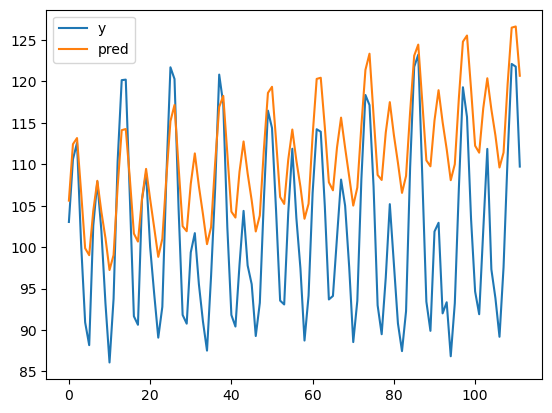

In [119]:
test_x[['y','pred']].plot()
plt.show()

In [121]:
print('MAPE : ',mean_absolute_percentage_error(test['y'],test_x['pred']))
print('RMSE : ',np.sqrt(mean_squared_error(test['y'],test_x['pred'])))

MAPE :  0.09947889159235872
RMSE :  11.127245929953505


In [147]:
## predicting for the next two years
future_df_pro=pd.DataFrame(data=pd.date_range(start='2019-10-01',end='2021-10-01',freq='M'),columns=['ds'])

In [149]:
future_df_pro['ds']=future_df_pro['ds'].apply(lambda x: '-'.join(str(x).split('-')[:-1]))
future_df_pro['ds']=pd.to_datetime(future_df_pro['ds'])
future_df_pro.head()

,ds
0,2019-10-01
1,2019-11-01
2,2019-12-01
3,2020-01-01
4,2020-02-01


In [153]:
model_p.predict(future_df_pro)[['ds','yhat']]

,ds,yhat
0,2019-10-01,114.005404
1,2019-11-01,113.040269
2,2019-12-01,118.205104
3,2020-01-01,121.808705
4,2020-02-01,118.160005
5,2020-03-01,114.710379
6,2020-04-01,111.193998
7,2020-05-01,113.374701
8,2020-06-01,120.811917
9,2020-07-01,127.567082


## ExponentialSmoothing

In [165]:
model_es=ExponentialSmoothing()

In [179]:
series=TimeSeries.from_dataframe(train_x,time_col='ds',value_cols='y')

In [181]:
model_es.fit(series)

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None, random_state=0, kwargs=None)

In [208]:
pred_exp=pd.DataFrame(model_es.predict(112).values(),columns=['pred'])
pred_exp

,pred
0,113.076056
1,113.548431
2,101.590707
3,91.261963
4,89.111644
...,...
107,119.661018
108,127.983626
109,128.456001
110,116.498277


In [212]:
test_x['pred_ex']=pred_exp['pred']
test_x

,ds,y,pred,pred_ex
0,2010-06-01,103.0377,105.612308,113.076056
1,2010-07-01,110.6045,112.421901,113.548431
2,2010-08-01,112.5792,113.160041,101.590707
3,2010-09-01,100.4701,106.701455,91.261963
4,2010-10-01,90.9259,99.866367,89.111644
...,...,...,...,...
107,2019-05-01,97.5860,111.415189,119.661018
108,2019-06-01,110.8580,119.659560,127.983626
109,2019-07-01,122.1014,126.479045,128.456001
110,2019-08-01,121.7765,126.619744,116.498277


In [214]:
print('MAPE : ',mean_absolute_percentage_error(test['y'],test_x['pred_ex']))
print('RMSE : ',np.sqrt(mean_squared_error(test['y'],test_x['pred_ex'])))

MAPE :  0.08655095062656745
RMSE :  10.335699236062206


## conclusion : I would choose ARIMA model to train and predict the next two years energy consumption because it has less MAPE and RMSE value than Prophet model and Exponential smoothing model.

In [223]:
next_2_arima.columns

Index(['ds', 'predicted_electricity_demand'], dtype='object')

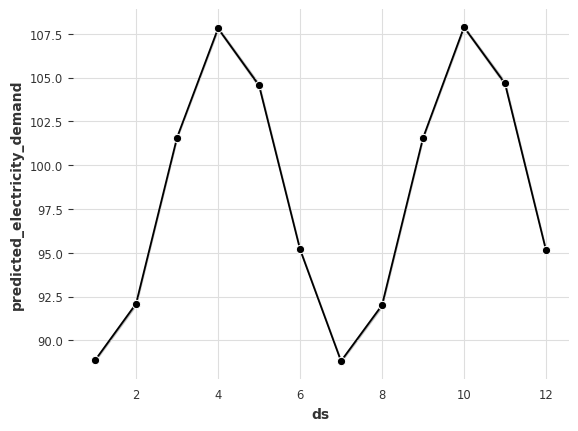

In [229]:
sns.lineplot(data=next_2_arima,x=next_2_arima.ds.dt.month,y=next_2_arima.predicted_electricity_demand,marker='o')
plt.show()